In [11]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
Note: you may need to restart the kernel to use updated packages.


In [29]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [30]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Hp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-22 Python-3.11.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

3. Make Detections with Images

In [4]:
from PIL import Image

img = Image.open(r"D:\Projects\yolo\test.jpg")

In [5]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 39.1ms pre-process, 125.8ms inference, 81.9ms NMS per image at shape (1, 3, 448, 640)


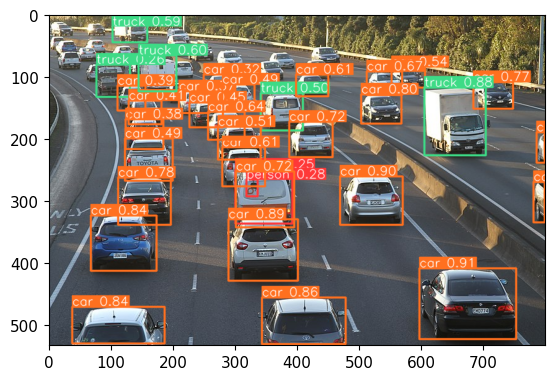

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

4. Real Time Detections

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['anger', 'fear', 'happy', 'neutral', 'sad', 'drowsy']
number_imgs = 20

In [11]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [12]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\anger.ebf3440b-1184-11ee-b25a-38baf88b25d0.jpg


In [13]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\anger.ec56a15a-1184-11ee-aded-38baf88b25d0.jpg
data\images\anger.ec56a15b-1184-11ee-a494-38baf88b25d0.jpg
data\images\anger.ec56a15c-1184-11ee-8130-38baf88b25d0.jpg
data\images\anger.ec56a15d-1184-11ee-823d-38baf88b25d0.jpg
data\images\anger.ec56a15e-1184-11ee-b985-38baf88b25d0.jpg
data\images\anger.ec56a15f-1184-11ee-9213-38baf88b25d0.jpg
data\images\anger.ec56a160-1184-11ee-8b8c-38baf88b25d0.jpg
data\images\anger.ec56a161-1184-11ee-9e14-38baf88b25d0.jpg
data\images\anger.ec56a162-1184-11ee-a52c-38baf88b25d0.jpg
data\images\anger.ec56a163-1184-11ee-87d3-38baf88b25d0.jpg
data\images\anger.ec56a164-1184-11ee-8f5c-38baf88b25d0.jpg
data\images\anger.ec56a165-1184-11ee-8888-38baf88b25d0.jpg
data\images\anger.ec56a166-1184-11ee-bd4c-38baf88b25d0.jpg
data\images\anger.ec56a167-1184-11ee-890f-38baf88b25d0.jpg
data\images\anger.ec56a168-1184-11ee-b6e8-38baf88b25d0.jpg
data\images\anger.ec56a169-1184-11ee-ad6f-38baf88b25d0.jpg
data\images\anger.ec56a16a-1184-11ee-a07f-38baf88b25d0.j

In [57]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [7]:
%pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Note: you may need to restart the kernel to use updated packages.


In [17]:
!cd yolov5 && python train.py --img 416 --batch 16 --epochs 600 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 7 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-178-ga199480 Python-3.11.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

6. Load Custom Model

In [68]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Hp/.cache\torch\hub\master.zip
YOLOv5  2023-6-28 Python-3.11.2 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX130, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [69]:
img = os.path.join('data', 'images', 'anger.51fcafe6-1184-11ee-9f61-38baf88b25d0.jpg')

In [63]:
img = os.path.join('testing','neutraltest1.jpg')

In [70]:
results = model(img)

In [71]:
results.print()

image 1/1: 480x640 1 angry
Speed: 132.7ms pre-process, 191.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


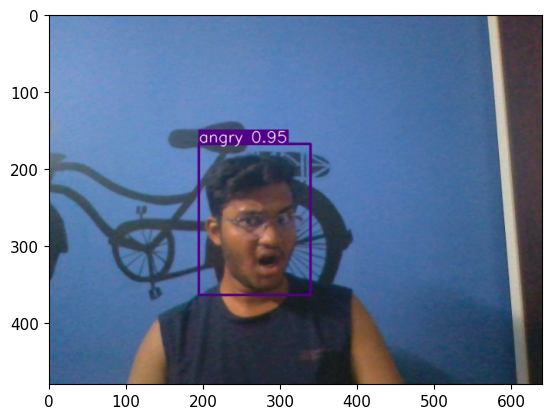

In [72]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [67]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()